### ***EDA***
- Exploring the data to gain a better understanding of it, before model building

#### ***Exploration Ideas***
- Summary stats
- Basic time series graph to see variation in precipitation over time
- Visualisation of seasonality
- Monthly / Seasonal Averages between decades -> is there a change in precip seasonality and overall levels over long periods of time?
- Correlations between last year overall precipitation and plastic pollution recorded

#### ***Packages***


In [50]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 12.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 12.7 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

##### ***Grabbing Dataframes***

In [3]:
ts_df = pd.read_pickle('C:\\Users\\liamr\\Documents\\Playground\\backup\\river_plastic_pollution\\data\\ts_df.pkl')
plastic_pollution = pd.read_pickle('C:\\Users\\liamr\\Documents\\Playground\\backup\\river_plastic_pollution\\data\\SE_top_10_pts.pkl')

In [4]:
ts_df

,river_ID,country,lon,lat,year,month,avg_precipitation
0,1,Malaysia,101.38875,3.00292,1960,1,263.625
1,2,Vietnam,106.74708,10.49875,1960,1,4.725
2,3,Thailand,100.55795,13.61573,1960,1,4.750
3,4,Myanmar,96.19083,16.77458,1960,1,7.125
4,5,Malaysia,110.39875,1.55542,1960,1,717.250
...,...,...,...,...,...,...,...
7195,6,Malaysia,101.41125,2.80458,2019,12,30.000
7196,7,Myanmar,96.10625,16.84125,2019,12,32.000
7197,8,Malaysia,102.24458,6.18208,2019,12,29.500
7198,9,Malaysia,103.34292,3.80625,2019,12,30.000


In [28]:
plastic_pollution.index = np.arange(1, len(plastic_pollution) + 1)
plastic_pollution['river_ID'] = plastic_pollution.index

# shift column 'Name' to first position 
first_column = plastic_pollution.pop('river_ID') 
  
# insert column
plastic_pollution.insert(0, 'river_ID', first_column) 

plastic_pollution

,river_ID,lon,lat,pollution_volume,country
1,1,101.38875,3.00292,12816.00,Malaysia
2,2,106.74708,10.49875,4127.44,Vietnam
3,3,100.55795,13.61573,4027.33,Thailand
4,4,96.19083,16.77458,3615.39,Myanmar
5,5,110.39875,1.55542,3274.70,Malaysia
6,6,101.41125,2.80458,2829.21,Malaysia
7,7,96.10625,16.84125,2488.62,Myanmar
8,8,102.24458,6.18208,2466.92,Malaysia
9,9,103.34292,3.80625,2186.88,Malaysia
10,10,103.79750,1.49625,2143.48,Malaysia


##### ***Cleaning***

- Removing the first decade due to inconsistency, likely to do with how WorldClim collect / processed the data

In [7]:
ts_df = ts_df[ts_df['year'] >= 1970]

In [8]:
# modify the dataframe by adding a column for month-year
ts_df['year_month'] = ts_df['year'].astype(str) + '-' + ts_df['month'].astype(str)

C:\Users\liamr\AppData\Local\Temp\ipykernel_66224\3090071547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['year_month'] = ts_df['year'].astype(str) + '-' + ts_df['month'].astype(str)


In [9]:
ts_df.info()

# convert year_month to string format
ts_df['year_month'] = ts_df['year_month'].astype(str)


ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1200 to 7199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   river_ID           6000 non-null   int64  
 1   country            6000 non-null   object 
 2   lon                6000 non-null   float64
 3   lat                6000 non-null   float64
 4   year               6000 non-null   int64  
 5   month              6000 non-null   int64  
 6   avg_precipitation  6000 non-null   float32
 7   year_month         6000 non-null   object 
dtypes: float32(1), float64(2), int64(3), object(2)
memory usage: 398.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1200 to 7199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   river_ID           6000 non-null   int64  
 1   country            6000 non-null   object 
 2   lon                6000 non-null   floa

C:\Users\liamr\AppData\Local\Temp\ipykernel_66224\2745951065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['year_month'] = ts_df['year_month'].astype(str)


In [10]:
ts_df.head()

,river_ID,country,lon,lat,year,month,avg_precipitation,year_month
1200,1,Malaysia,101.38875,3.00292,1970,1,30.50,1970-1
1201,2,Vietnam,106.74708,10.49875,1970,1,29.25,1970-1
1202,3,Thailand,100.55795,13.61573,1970,1,32.00,1970-1
1203,4,Myanmar,96.19083,16.77458,1970,1,32.00,1970-1
1204,5,Malaysia,110.39875,1.55542,1970,1,29.50,1970-1


In [11]:
# checking avg_precipitation_all_rivers_per_year is correct
ts_df[(ts_df['year_month'] >= '1990-12') & 
                 (ts_df['year_month'] <= '1991-01')]


,river_ID,country,lon,lat,year,month,avg_precipitation,year_month
3610,1,Malaysia,101.38875,3.00292,1990,2,32.00,1990-2
3611,2,Vietnam,106.74708,10.49875,1990,2,31.25,1990-2
3612,3,Thailand,100.55795,13.61573,1990,2,33.00,1990-2
3613,4,Myanmar,96.19083,16.77458,1990,2,34.75,1990-2
3614,5,Malaysia,110.39875,1.55542,1990,2,30.25,1990-2
...,...,...,...,...,...,...,...,...
3715,6,Malaysia,101.41125,2.80458,1990,12,30.00,1990-12
3716,7,Myanmar,96.10625,16.84125,1990,12,32.50,1990-12
3717,8,Malaysia,102.24458,6.18208,1990,12,29.00,1990-12
3718,9,Malaysia,103.34292,3.80625,1990,12,29.00,1990-12


In [12]:
# modify the dataframe by adding a column which averages the avg_precipitation across months 1-12 for each separate year
ts_df['avg_precipitation_all_rivers_per_year'] = ts_df.groupby(['year'])['avg_precipitation'].transform('mean')

# modify the dataframe by adding a column which averages the avg_precipitation across rivers 1-10 for each separate month
ts_df['avg_precipitation_all_rivers_per_month'] = ts_df.groupby(['year_month'])['avg_precipitation'].transform('mean')


C:\Users\liamr\AppData\Local\Temp\ipykernel_66224\741173273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['avg_precipitation_all_rivers_per_year'] = ts_df.groupby(['year'])['avg_precipitation'].transform('mean')
C:\Users\liamr\AppData\Local\Temp\ipykernel_66224\741173273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['avg_precipitation_all_rivers_per_month'] = ts_df.groupby(['year_month'])['avg_precipitation'].transform('mean')


##### ***Summary Stats***

In [13]:
ts_summary_stats = ts_df.describe()
print(ts_summary_stats)

          river_ID          lon          lat         year       month  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.00000   
mean      5.500000   102.218586     7.657781  1994.500000     6.50000   
std       2.872521     4.110972     5.903516    14.432072     3.45234   
min       1.000000    96.106250     1.496250  1970.000000     1.00000   
25%       3.000000   100.557950     2.804580  1982.000000     3.75000   
50%       5.500000   101.827915     4.994165  1994.500000     6.50000   
75%       8.000000   103.797500    13.615730  2007.000000     9.25000   
max      10.000000   110.398750    16.841250  2019.000000    12.00000   

       avg_precipitation  avg_precipitation_all_rivers_per_year  \
count        6000.000000                            6000.000000   
mean           31.462126                              31.462126   
std             1.654789                               0.361322   
min            27.000000                              30.727083   
25%    

In [14]:
pollution_summary_stats = plastic_pollution.describe()
print(pollution_summary_stats)

              lon        lat  pollution_volume
count   10.000000  10.000000         10.000000
mean   102.218586   7.657781       3997.597000
std      4.332984   6.222334       3182.455284
min     96.106250   1.496250       2143.480000
25%    100.765650   2.854165       2472.345000
50%    101.827915   4.994165       3051.955000
75%    103.683855  12.836485       3924.345000
max    110.398750  16.841250      12816.000000


#### Precipitation Data
- Plot precipitation trends over time
    - Is there seasonality?
    - Are there long term trends?

## ***Trend Analysis***

### ***Long-Term Trends | All Rivers | Annual Precipitation***

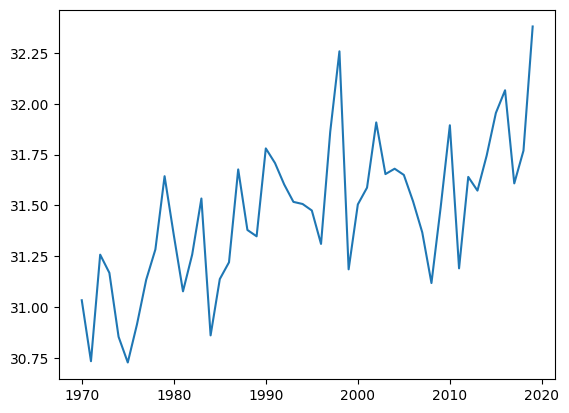

In [15]:
# using matplotlib
plt.plot(ts_df['year'],ts_df['avg_precipitation_all_rivers_per_year'])
plt.show()

In [16]:
# using plotly
fig = px.line(ts_df, x="year", y="avg_precipitation_all_rivers_per_year")
fig.show()


### ***Since 2010 | All Rivers | Annual Precipitation***

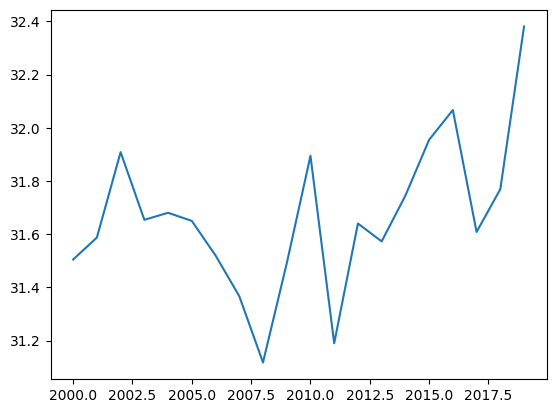

In [17]:
# using matplotlib since 2000
ts_df_2000 = ts_df[ts_df['year'] >= 2000]

plt.plot(ts_df_2000['year'], ts_df_2000['avg_precipitation_all_rivers_per_year'])
plt.show()

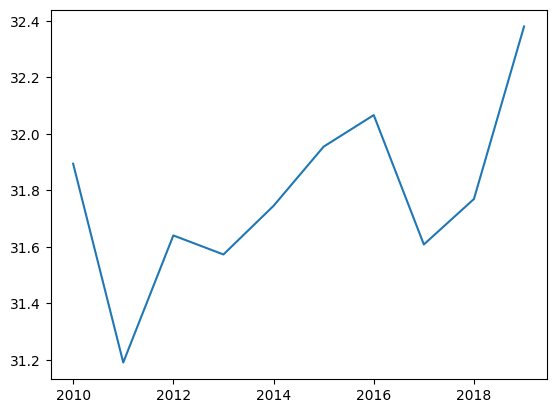

In [18]:
# using matplotlib since 2010
ts_df_2010 = ts_df[ts_df['year'] >= 2010]

plt.plot(ts_df_2010['year'], ts_df_2010['avg_precipitation_all_rivers_per_year'])
plt.show()

In [19]:
# using plotly since 2000
fig = px.line(ts_df_2000, x="year", y="avg_precipitation_all_rivers_per_year")   
fig.show()

In [20]:
# using plotly
fig = px.line(ts_df_2010, x="year", y="avg_precipitation_all_rivers_per_year")   
fig.show()

### **Trend Analysis Summary:**
- There is a clear upward trend since 1970 up until 2019
- Can see from the graphs that the trend has been relatively stable since 2000
    - Therefore this is a good period to use in my analysis when averaging precipitation levels across all years

##### **For analysis:** Will average the precipitation data from 2000-2019 for each month across the years

## ***Seasonality Analysis***

In [ ]:
# 2019 precipitation
ts_df_2019 = ts_df[ts_df['year'] == 2019]
fig1 = px.line(ts_df_2019, x="year_month", y="avg_precipitation_all_rivers_per_month")   

# 2010 precipitation
ts_df_2010 = ts_df[ts_df['year'] == 2010]
fig2 = px.line(ts_df_2010, x="year_month", y="avg_precipitation_all_rivers_per_month")   

# 2000 precipitation
ts_df_2000 = ts_df[ts_df['year'] == 2000]
fig3 = px.line(ts_df_2010, x="year_month", y="avg_precipitation_all_rivers_per_month") 

# 1990 precipitation
ts_df_1990 = ts_df[ts_df['year'] == 1990]
fig4 = px.line(ts_df_1990, x="year_month", y="avg_precipitation_all_rivers_per_month") 

# 1980 precipitation
ts_df_1980 = ts_df[ts_df['year'] == 1980]
fig5 = px.line(ts_df_1980, x="year_month", y="avg_precipitation_all_rivers_per_month")

# 1970 precipitation
ts_df_1970 = ts_df[ts_df['year'] == 1970]
fig6 = px.line(ts_df_1970, x="year_month", y="avg_precipitation_all_rivers_per_month")

# make subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("2019", "2010", "2000", "1990", "1980", "1970"))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)
fig.add_trace(fig5.data[0], row=3, col=1)
fig.add_trace(fig6.data[0], row=3, col=2)
# add title to the figure
fig.update_layout(title_text="Precipitation by Month - All Rivers", title_x=0.5)
fig.show()

In [22]:
# show a column plot with month on x axis and average precipitation on y axis


- There is clear seasonality consistent through the whole time period
- Significantly more rain in Feb-June period

### Clear evidence of seasonality

- Create an average monthly precipitation profile for each river by aggregating precipitation data across all years (this will be your seasonal baseline).
- Normalize monthly precipitation to derive P(M) for each river.

##### Implications for modelling:

- The normalized P(M) will serve as a key input for your model to distribute the annual plastic pollution figure across the months
- Seasonal patterns (e.g., monsoons, dry seasons) will directly reflect in the predicted monthly plastic pollution estimates

## Profiles of each river:
- Find the precipitation values for each year and average them over the 2000-2019 period
- Use annual plastic pollution values for each river, from the Ocean cleanup
- **Visualize the correlations:**
    - Scatter graphs and correlation matrices

In [56]:
# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling to precipitation per river
ts_df['normalized_precipitation'] = ts_df.groupby('river_ID')['avg_precipitation'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)



C:\Users\liamr\AppData\Local\Temp\ipykernel_66224\1587449181.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Using non-normalized precipitation values...

In [ ]:
# Aggregate the yearly precipitation values for each river and average them over the 2000-2019 period
river_1 = ts_df.query("river_ID == 1 and year >= 2000")
river_1 = river_1.groupby('year')['avg_precipitation'].mean()
# find the average of all the years in river_1
avg_precip_river_1 = river_1.mean()

river_2 = ts_df.query("river_ID == 2 and year >= 2000")
river_2 = river_2.groupby('year')['avg_precipitation'].mean()
avg_precip_river_2 = river_2.mean()

# repeat the code for rivers 3-10  
river_3 = ts_df.query("river_ID == 3 and year >= 2000")
river_3 = river_3.groupby('year')['avg_precipitation'].mean()
avg_precip_river_3 = river_3.mean()

# repeat the code for rivers 4-10  
river_4 = ts_df.query("river_ID == 4 and year >= 2000")
river_4 = river_4.groupby('year')['avg_precipitation'].mean()
avg_precip_river_4 = river_4.mean()

river_5 = ts_df.query("river_ID == 5 and year >= 2000")
river_5 = river_5.groupby('year')['avg_precipitation'].mean()
avg_precip_river_5 = river_5.mean()

river_6 = ts_df.query("river_ID == 6 and year >= 2000")
river_6 = river_6.groupby('year')['avg_precipitation'].mean()
avg_precip_river_6 = river_6.mean()

river_7 = ts_df.query("river_ID == 7 and year >= 2000")
river_7 = river_7.groupby('year')['avg_precipitation'].mean()
avg_precip_river_7 = river_7.mean()

river_8 = ts_df.query("river_ID == 8 and year >= 2000")
river_8 = river_8.groupby('year')['avg_precipitation'].mean()
avg_precip_river_8 = river_8.mean()

river_9 = ts_df.query("river_ID == 9 and year >= 2000") 
river_9 = river_9.groupby('year')['avg_precipitation'].mean()
avg_precip_river_9 = river_9.mean()

river_10 = ts_df.query("river_ID == 10 and year >= 2000")
river_10 = river_10.groupby('year')['avg_precipitation'].mean()
avg_precip_river_10 = river_10.mean()

# put all these averages into a dataframe
df_avg_precip = pd.DataFrame({'river_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'avg_precip_river': [avg_precip_river_1, 
                                        avg_precip_river_2, 
                                        avg_precip_river_3, 
                                        avg_precip_river_4, 
                                        avg_precip_river_5, 
                                        avg_precip_river_6, 
                                        avg_precip_river_7, 
                                        avg_precip_river_8, 
                                        avg_precip_river_9, 
                                        avg_precip_river_10]})

df_avg_precip

,river_ID,avg_precip_river
0,1,31.795834
1,2,31.095835
2,3,32.706245
3,4,32.603127
4,5,31.692709
5,6,31.141668
6,7,32.728127
7,8,31.064587
8,9,31.174999
9,10,30.648960


#### Using normalized precipitation values...

In [57]:
# Aggregate the yearly precipitation values for each river and average them over the 2000-2019 period
river_1 = ts_df.query("river_ID == 1 and year >= 2000")
river_1 = river_1.groupby('year')['normalized_precipitation'].mean()
# find the average of all the years in river_1
avg_precip_river_1 = river_1.mean()

river_2 = ts_df.query("river_ID == 2 and year >= 2000")
river_2 = river_2.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_2 = river_2.mean()

# repeat the code for rivers 3-10  
river_3 = ts_df.query("river_ID == 3 and year >= 2000")
river_3 = river_3.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_3 = river_3.mean()

# repeat the code for rivers 4-10  
river_4 = ts_df.query("river_ID == 4 and year >= 2000")
river_4 = river_4.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_4 = river_4.mean()

river_5 = ts_df.query("river_ID == 5 and year >= 2000")
river_5 = river_5.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_5 = river_5.mean()

river_6 = ts_df.query("river_ID == 6 and year >= 2000")
river_6 = river_6.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_6 = river_6.mean()

river_7 = ts_df.query("river_ID == 7 and year >= 2000")
river_7 = river_7.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_7 = river_7.mean()

river_8 = ts_df.query("river_ID == 8 and year >= 2000")
river_8 = river_8.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_8 = river_8.mean()

river_9 = ts_df.query("river_ID == 9 and year >= 2000") 
river_9 = river_9.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_9 = river_9.mean()

river_10 = ts_df.query("river_ID == 10 and year >= 2000")
river_10 = river_10.groupby('year')['normalized_precipitation'].mean()
avg_precip_river_10 = river_10.mean()

# put all these averages into a dataframe
df_avg_precip_normalized = pd.DataFrame({'river_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'avg_precip_river': [avg_precip_river_1, 
                                        avg_precip_river_2, 
                                        avg_precip_river_3, 
                                        avg_precip_river_4, 
                                        avg_precip_river_5, 
                                        avg_precip_river_6, 
                                        avg_precip_river_7, 
                                        avg_precip_river_8, 
                                        avg_precip_river_9, 
                                        avg_precip_river_10]})

df_avg_precip_normalized

,river_ID,avg_precip_river
0,1,0.588596
1,2,0.553205
2,3,0.494531
3,4,0.375915
4,5,0.598732
5,6,0.628334
6,7,0.355060
7,8,0.580655
8,9,0.695834
9,10,0.588657


In [29]:
plastic_pollution

,river_ID,lon,lat,pollution_volume,country
1,1,101.38875,3.00292,12816.00,Malaysia
2,2,106.74708,10.49875,4127.44,Vietnam
3,3,100.55795,13.61573,4027.33,Thailand
4,4,96.19083,16.77458,3615.39,Myanmar
5,5,110.39875,1.55542,3274.70,Malaysia
6,6,101.41125,2.80458,2829.21,Malaysia
7,7,96.10625,16.84125,2488.62,Myanmar
8,8,102.24458,6.18208,2466.92,Malaysia
9,9,103.34292,3.80625,2186.88,Malaysia
10,10,103.79750,1.49625,2143.48,Malaysia


### Correlations between Average Precipitation and Pollution

In [58]:
# merge the two dataframes

# non-normalized
average_rain_and_pollution = pd.merge(df_avg_precip, plastic_pollution, on='river_ID', how='outer')

# normalized
average_rain_and_pollution_normalized = pd.merge(df_avg_precip_normalized, plastic_pollution, on='river_ID', how='outer')

In [59]:
average_rain_and_pollution

,river_ID,avg_precip_river,lon,lat,pollution_volume,country
0,1,31.795834,101.38875,3.00292,12816.00,Malaysia
1,2,31.095835,106.74708,10.49875,4127.44,Vietnam
2,3,32.706245,100.55795,13.61573,4027.33,Thailand
3,4,32.603127,96.19083,16.77458,3615.39,Myanmar
4,5,31.692709,110.39875,1.55542,3274.70,Malaysia
5,6,31.141668,101.41125,2.80458,2829.21,Malaysia
6,7,32.728127,96.10625,16.84125,2488.62,Myanmar
7,8,31.064587,102.24458,6.18208,2466.92,Malaysia
8,9,31.174999,103.34292,3.80625,2186.88,Malaysia
9,10,30.648960,103.79750,1.49625,2143.48,Malaysia


In [60]:
average_rain_and_pollution_normalized

,river_ID,avg_precip_river,lon,lat,pollution_volume,country
0,1,0.588596,101.38875,3.00292,12816.00,Malaysia
1,2,0.553205,106.74708,10.49875,4127.44,Vietnam
2,3,0.494531,100.55795,13.61573,4027.33,Thailand
3,4,0.375915,96.19083,16.77458,3615.39,Myanmar
4,5,0.598732,110.39875,1.55542,3274.70,Malaysia
5,6,0.628334,101.41125,2.80458,2829.21,Malaysia
6,7,0.355060,96.10625,16.84125,2488.62,Myanmar
7,8,0.580655,102.24458,6.18208,2466.92,Malaysia
8,9,0.695834,103.34292,3.80625,2186.88,Malaysia
9,10,0.588657,103.79750,1.49625,2143.48,Malaysia


#### Non-Normalized...

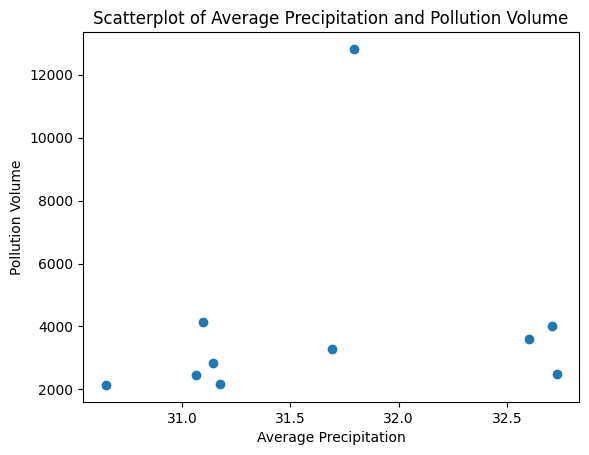

In [31]:
# scatterplot between rainfall and pollution
plt.scatter(average_rain_and_pollution['avg_precip_river'], average_rain_and_pollution['pollution_volume'])
plt.xlabel('Average Precipitation')
plt.ylabel('Pollution Volume')
plt.title('Scatterplot of Average Precipitation and Pollution Volume')
plt.show()

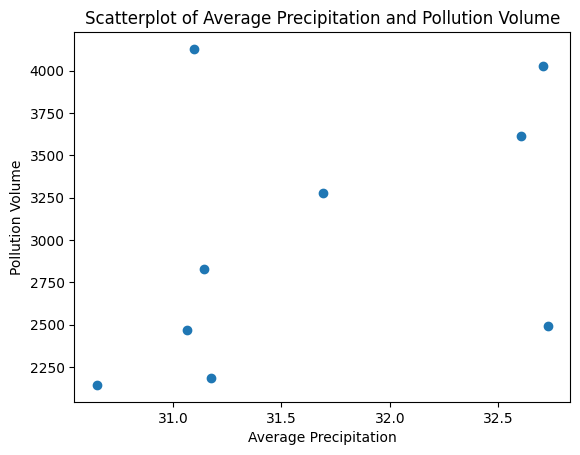

In [32]:
# take out the outlier river 1 from the scatterplot
average_rain_and_pollution_no_outlier = average_rain_and_pollution[average_rain_and_pollution['river_ID'] != 1]
plt.scatter(average_rain_and_pollution_no_outlier['avg_precip_river'], average_rain_and_pollution_no_outlier['pollution_volume'])
plt.xlabel('Average Precipitation')
plt.ylabel('Pollution Volume')
plt.title('Scatterplot of Average Precipitation and Pollution Volume')
plt.show()

#### Normalized...

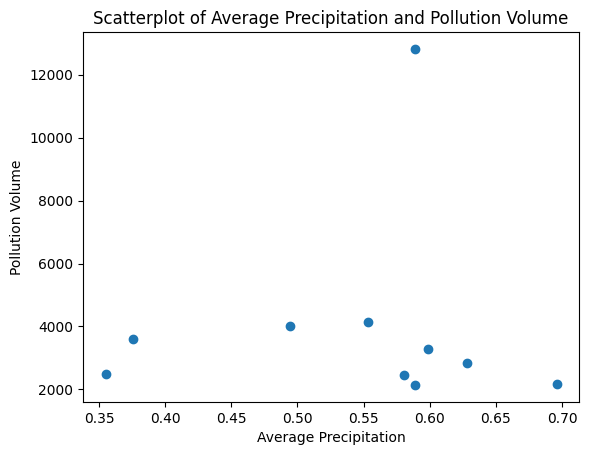

In [62]:
# with normalized precipitation averages
plt.scatter(average_rain_and_pollution_normalized['avg_precip_river'], average_rain_and_pollution_normalized['pollution_volume'])
plt.xlabel('Average Precipitation')
plt.ylabel('Pollution Volume')
plt.title('Scatterplot of Average Precipitation and Pollution Volume')
plt.show()

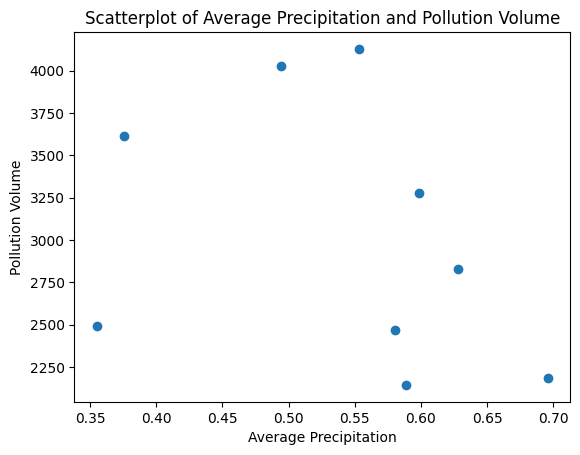

In [63]:
normalized_average_rain_and_pollution_no_outlier = average_rain_and_pollution_normalized[average_rain_and_pollution_normalized['river_ID'] != 1]
plt.scatter(normalized_average_rain_and_pollution_no_outlier['avg_precip_river'], normalized_average_rain_and_pollution_no_outlier['pollution_volume'])
plt.xlabel('Average Precipitation')
plt.ylabel('Pollution Volume')
plt.title('Scatterplot of Average Precipitation and Pollution Volume')
plt.show()


#### Non-Normalized figures correlation coefficients:

In [45]:
# pearson correlation coefficient
corr, p_value = pearsonr(average_rain_and_pollution_no_outlier['avg_precip_river'], 
                          average_rain_and_pollution_no_outlier['pollution_volume'])
print(f"Spearman Correlation: {corr}, P-Value: {p_value}")

Spearman Correlation: 0.4275794632621116, P-Value: 0.2509749559473871


In [44]:
# spearman correlation coefficient
corr, p_value = spearmanr(average_rain_and_pollution_no_outlier['avg_precip_river'], 
                          average_rain_and_pollution_no_outlier['pollution_volume'])
print(f"Spearman Correlation: {corr}, P-Value: {p_value}")

Spearman Correlation: 0.39999999999999997, P-Value: 0.2861051019083129


#### Normalized figures correlation coefficients:

In [ ]:
# pearson correlation coefficient
corr, p_value = pearsonr(normalized_average_rain_and_pollution_no_outlier['avg_precip_river'], 
                          normalized_average_rain_and_pollution_no_outlier['pollution_volume'])
print(f"Spearman Correlation: {corr}, P-Value: {p_value}")

In [64]:
# spearman correlation coefficient
corr, p_value = spearmanr(normalized_average_rain_and_pollution_no_outlier['avg_precip_river'], 
                          normalized_average_rain_and_pollution_no_outlier['pollution_volume'])
print(f"Spearman Correlation: {corr}, P-Value: {p_value}")

Spearman Correlation: -0.43333333333333335, P-Value: 0.24395243588005167


- There does appear to be some correlation between average precipitation levels and pollution volume, especially in the non-normalized values

In [66]:
average_rain_and_pollution.to_pickle('C:\\Users\\liamr\\Documents\\Playground\\backup\\river_plastic_pollution\\data\\average_rain_and_pollution.pkl')